### Treść zadania

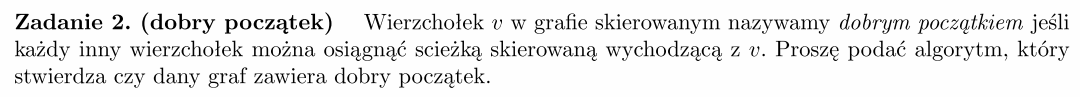

### Omówienie algorytmu

###### Przemyślenia
W tym przypadku pierwsze, co się nasuwa na myśl, to sortowanie topologiczne. Nie możemy jednak go użyć, a przynajmniej nie od razu, ponieważ graf jest grafem skierowanym, ale może mieć cykle. Warto sobie przypomnieć, że jeżeli graf posiada cykl, to wszystkie wierzchołki, które leżą na cyklu, są osiągalne z każdego innego wierzchołka na tym cyklu. Musimy więc wyeliminować grupy wierzchołków, dla których z każdego wierzchołka w danej grupie możliwe jest osiągnięcie dowolnego innego wierzchołka w tej grupie, ponieważ wówczas wytarczy sprawdzić, czy w grafie da się dotrzeć do chociaż jednego z tych wierzchołków i będziemy mieli pewność, że każdy wierzchołek z tej grupy jest osiągalny. W tym momencie powinien przyjść nam na myśl algorytm znajdowania silnie spójnych składowych w grafie skierowanym, który pozwoli nam utworzyć takie grupy wierzchołków, które następnie zastąpimy pojedynczym wierzchołkiem. (Silnie spójnie składowe nie muszą być cyklami, a powyżej to, co nazywałem cyklem odnosi się do silnie spójnych składowych). Mając już graf silnie spójnych składowych, możemy go posortować topologicznie, ponieważ mamy pewność, że jest to DAG. Wówczas wystarczy tylko sprawdzić, czy z wierzchołka, który jest pierwszy w porządku topologicznym, da się przejść jakąś ścieżką (dowolną) do każdego innego wierzchołka. W szczególności może być kilka źródeł (wierzchołków bez krawędzi wchodzących), co też musimy wykryć. Zauważmy następującą zależność: jeżeli sprawdzamy dany wierzchołek w tablicy posortowanych topologicznie wierzchołków, mamy pewność, że ze wszystkich wierzchołków, które znajdują się dalej w porządku od bieżącego wierzchołka (wraz z bieżącym wierzchołkiem), prowadzą krawędzie tylko do wierzchołków, które znajdują się dalej od nich w porządku topolgicznym, więc nie istnieje szansa, żebyśmy się wrócili do przetworzonego wcześniej wierzchołka (bo inaczej istniałby cykl, a my mamy DAG). Zatem, jeżeli nie udało nam się dotrzeć do bieżącego wierzchołka wcześniej, oznacza to, że w grafie nie istnieje dobry początek, ponieważ albo istnieje jedno źródło, które jest jedynym kandydatem na dobry początek i z niego nie ma ścieżki do bieżącego wierzchołka, albo w grafie jest kilka źródeł, a więc niemożliwe jest osiągnięcie innego źródła z danego źródła (bo źródło nie ma krawędzi wchodzących).
###### Algorytm
Najpierw szukamy silnie spójnych składowych w grafie skierowanym, a następnie tworzymy graf, który zawiera spójne składowe jako wierzchołki (graf silnie spójnych składowych). W kolejnym kroku sortujemy topologicznie ten graf silnie spójnych składowych, tworzymy tablicę o wielkości tego grafu, w której zapisjemy wartości $ False $, a następnie, przeglądamy graf, w kolejności posortowanych topologicznie wierzchołków, dla każdego z tych wierzchołków, przeglądając wszystkich jego sąsiadów i zaznaczając w tablicy wartości boolowskich $ True $ dla każego z tych sąsiadów. Jeżeli przed przystąpieniem do zaznaczania sąsiadów, zaczniemy przetwarzać wierzchołek, dla którego w tablicy znajduje się wartość $ False $, oznacza to, że nie dotarliśmy wcześniej do tego wierzchołka, więc nie jest on osiągalny ze źródła. (Zapomniałem wcześniej napisać, ale oczywiście na początku, po utworzeniu tablicy wartości boolowskich, zapisujemy $ True $ dla pierwszego w porządku topologicznym wierzchołka, aby algorytm mógł w ogóle zacząć działanie - przeglądanie wierzchołków).

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $

### Implementacja

In [1]:
def get_process_times(G: 'graph represented by adjacency lists'):
    n = len(G)
    times = [0] * n
    visited = [False] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal time
        time += 1
        times[u] = time
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return times


def transpose_graph(G: 'directed graph represented by adjacency lists'):
    n = len(G)
    # Store indices of the beginnings of new neighbours added to each vertex
    new_indices = [len(G[u]) for u in range(n)]
    
    # For each vertex remove its all old neighbours (vertices stored before the
    # first new added vertex) and for each of these removed neighbours append 
    # the current vertex to their new neighbours (this will be a reversed edge)
    for u in range(n):
        for _ in range(new_indices[u]):
            v = G[u].popleft()
            G[v].append(u)
        new_indices[u] = 0


def find_coherent_components(G: 'graph represented by adjacency lists'):
    n = len(G)
    # Get processing time of each vertex
    times = get_process_times(G)
    # Transpose a graph
    transpose_graph(G)
    # Get order of vertices in which DFS will be started from such vertices
    order = sorted(range(n), key=lambda i: times[i], reverse=True)
    # Create an array in which a result will be stored (each number will refer
    # to the other coherent component of a graph)
    result = [-1] * n  # This array will also be used to check if a vertex was visited
    num = 0
    
    def dfs(u):
        result[u] = num
        for v in G[u]:
            if result[v] < 0:
                dfs(v)
        
    # Start dfs from vertices of the highest processing time
    for i in range(n):
        u = order[i]
        if result[u] < 0:
            dfs(u)
            num += 1
            
    # Transpose a graph again (in order to get the same graph
    # as the input)
    transpose_graph(G)
            
    return result, num


def topological_sort(G: 'graph represented by adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def coherent_components_graph(G: 'directed graph represented by adjacency lists',
                              components, n2):
    n = len(G)
    G2 = [[] for _ in range(n2)]
    
    for u in range(n):
        for v in G[u]:
            u2 = components[u]
            v2 = components[v]
            if v2 != u2:
                G2[u2].append(v2)
                
    return G2
    

def find_good_beginning(G: 'directed graph represented by adjacency lists'):
    comp, n2 = find_coherent_components(G)
    print(comp, n2)
    G2 = coherent_components_graph(G, comp, n2)
    print(G2)
    t_sorted = topological_sort(G2)
    print(t_sorted)
    
    reachable = [False] * n2
    reachable[t_sorted[0]] = True
    
    for u in range(n2):
        if not reachable[u]:
            return None
        for v in G2[u]:
            reachable[v] = True
            
    # If a loop was finished succesfully, a vertex which we started in
    # is a good beginning
    return comp.index(t_sorted[0])

###### Kilka testów

##### Pomocnicze

In [2]:
from collections import deque


def directed_graph_list(E: 'array of edges'):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    
    G = [deque() for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

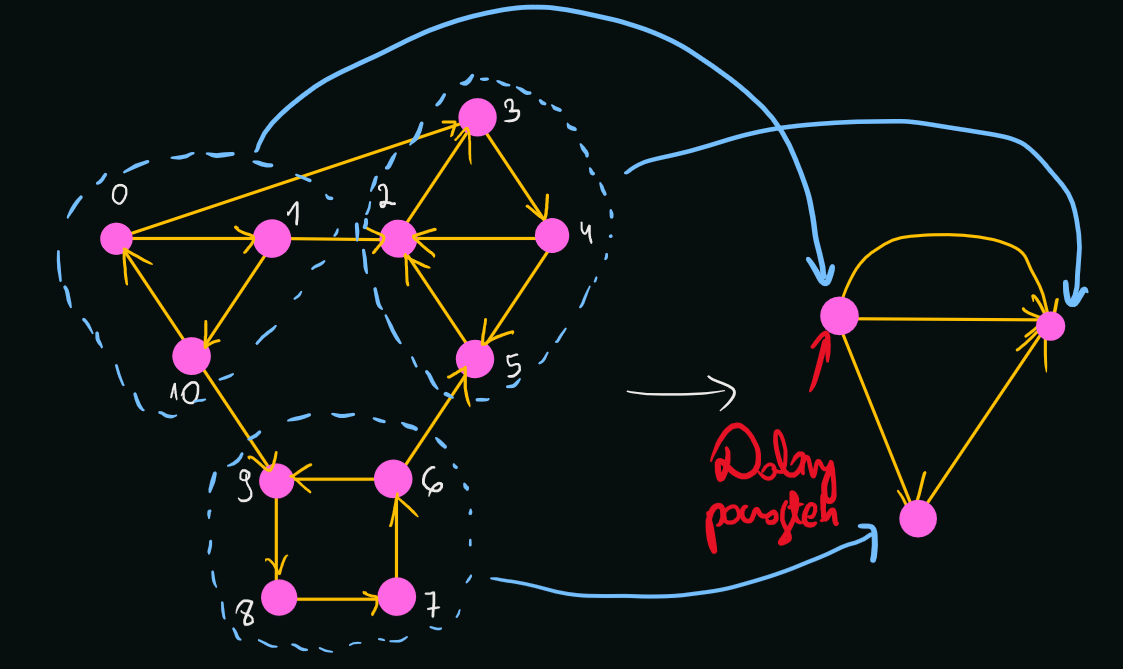

In [3]:
E = [(0, 3), (0, 1), (1, 2), (1, 10), (2, 3), (3, 4), (4, 2), (4, 5), (5, 2), (6, 5), (6, 9), (7, 6), (8, 7),
     (9, 8), (10, 9), (10, 0)]

G = directed_graph_list(E)
# Prawidłowe odpowiedzi to: 0, 1, 10, bo wszystkie te wierzchołki należą do jednej
# silnie spójnej składowej, która jest dobrym początkiem
print(find_good_beginning(G))

[0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0] 3
[[2, 2, 1], [2], []]
[0, 1, 2]
0


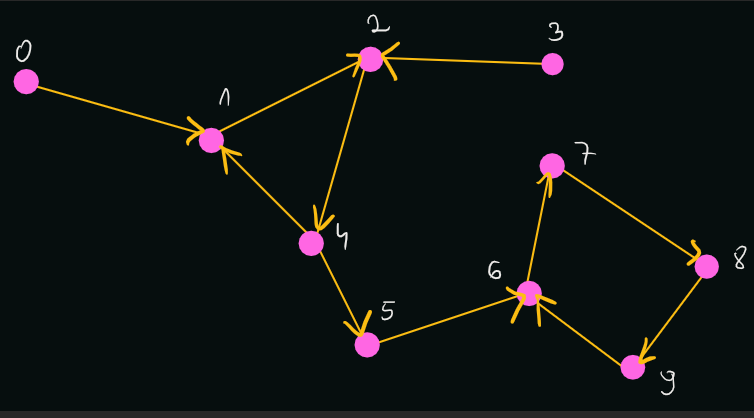

In [4]:
E = [(0, 1), (1, 2), (3, 2), (2, 4), (4, 1), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 6)]
G = directed_graph_list(E)
print(find_good_beginning(G))  # None, bo nie osiągniemy 3 lub 0 (2 źródła)

[1, 2, 2, 0, 2, 3, 4, 4, 4, 4] 5
[[2], [2], [3], [4], []]
[1, 0, 2, 3, 4]
None


In [5]:
E = [(0, 1), (1, 2), (3, 2), (2, 4), (4, 1), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 6), (3, 0)]
G = directed_graph_list(E)
print(find_good_beginning(G))  # Po dodaiu krawędzi z 3 do 0, 3 jest dobrym początkiem

[1, 2, 2, 0, 2, 3, 4, 4, 4, 4] 5
[[1, 2], [2], [3], [4], []]
[0, 1, 2, 3, 4]
3
